<a href="https://colab.research.google.com/github/PranjalMinocha/PHN-300_LBP/blob/main/LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

Creating a dictionary to store image paths with labels as keys

In [ ]:
df = {"label":[], "img":[]}
for root, __, files in os.walk("/content/drive/MyDrive/LBP sample data/"):
  if(len(files)>0):
    label = root.replace("/content/drive/MyDrive/LBP sample data/","")
    for f in files:
      df["label"].append(label)
      df["img"].append(np.array(Image.open(os.path.join(root, f)))/65536.0)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,label,img
0,Clear,"[[0.0706787109375, 0.07232666015625, 0.0730438..."
1,Cloudy,"[[0.0045013427734375, 0.0044097900390625, 0.00..."
2,Thin Layered Clouds,"[[0.0712127685546875, 0.0739593505859375, 0.07..."
3,Cloudy,"[[0.0048370361328125, 0.0042572021484375, 0.00..."
4,Clear,"[[0.0757598876953125, 0.0732574462890625, 0.07..."


Train-Test split

In [ ]:
X = df["img"]
y = df["label"]

In [ ]:
#we know cloudy>partly cloudy>Thin Layered Clouds>Clear in brightness hence we apply following encoding
def label_encode(s):
  d = {"Clear": 0, "Thin Layered Clouds": 1, "Partly Cloudy": 2, "Cloudy":3}
  return d[s]

In [ ]:
y = y.apply(label_encode)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(128, 32, 128, 32)

2


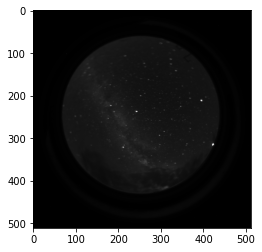

In [ ]:
plt.imshow(X_train.iloc[0], cmap='gray')
print(y_train.iloc[0])

#Building Model

Flattening all the images

In [ ]:
X_train_flattened = np.vstack(X_train.apply(lambda x: np.reshape(x, -1)))
X_test_flattened = np.vstack(X_test.apply(lambda x: np.reshape(x, -1)))

In [ ]:
X_train_flattened.shape

(128, 261121)

Applying Label Encoding

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(261121,), activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 170ms/step - loss: 12.8242 - accuracy: 0.2656
Epoch 2/50
4/4 [==============================] - 1s 169ms/step - loss: 9.4107 - accuracy: 0.3828
Epoch 3/50
4/4 [==============================] - 1s 173ms/step - loss: 7.7988 - accuracy: 0.4531
Epoch 4/50
4/4 [==============================] - 1s 172ms/step - loss: 5.0356 - accuracy: 0.4922
Epoch 5/50
4/4 [==============================] - 1s 169ms/step - loss: 6.1303 - accuracy: 0.6641
Epoch 6/50
4/4 [==============================] - 1s 171ms/step - loss: 2.3364 - accuracy: 0.6406
Epoch 7/50
4/4 [==============================] - 1s 167ms/step - loss: 2.0446 - accuracy: 0.5703
Epoch 8/50
4/4 [==============================] - 1s 167ms/step - loss: 0.8149 - accuracy: 0.7266
Epoch 9/50
4/4 [==============================] - 1s 168ms/step - loss: 1.2873 - accuracy: 0.6562
Epoch 10/50
4/4 [==============================] - 1s 167ms/step - loss: 1.1291 - accuracy: 0.8047
Epoch 11/50
4/4 [=

In [ ]:
model.evaluate(X_test_flattened,y_test)

1/1 [==============================] - 0s 190ms/step - loss: 0.1429 - accuracy: 0.9375


[0.14293894171714783, 0.9375]

In [ ]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

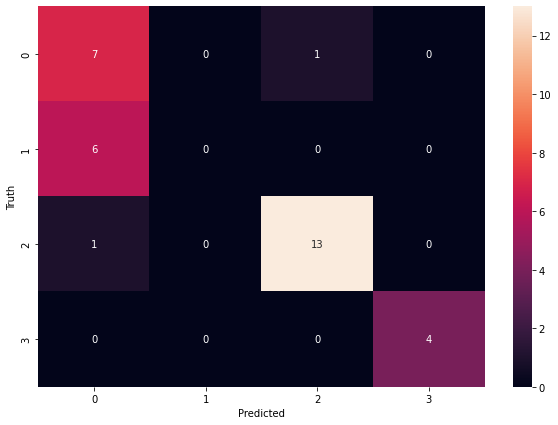

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')